**Prediction using Decision Tree**

## Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Checking the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df['SepalLengthCm'].nunique()

35

In [9]:
#Removing unwanted columns as 'Id' column is not affecting the labels so we will remove that
df1=df.drop('Id',axis=1)

In [27]:
#In 'Species' column th data is not numerical so convert it into numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Species']=le.fit_transform(df1['Species'])
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Exploratory Data **Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


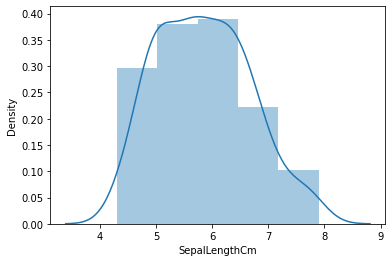

In [28]:
import seaborn as sns
sns.distplot(df1['SepalLengthCm'],bins=5)

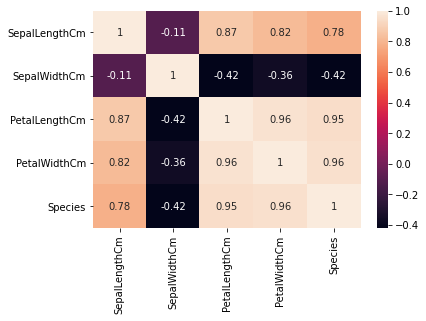

In [29]:
corelation=df1.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

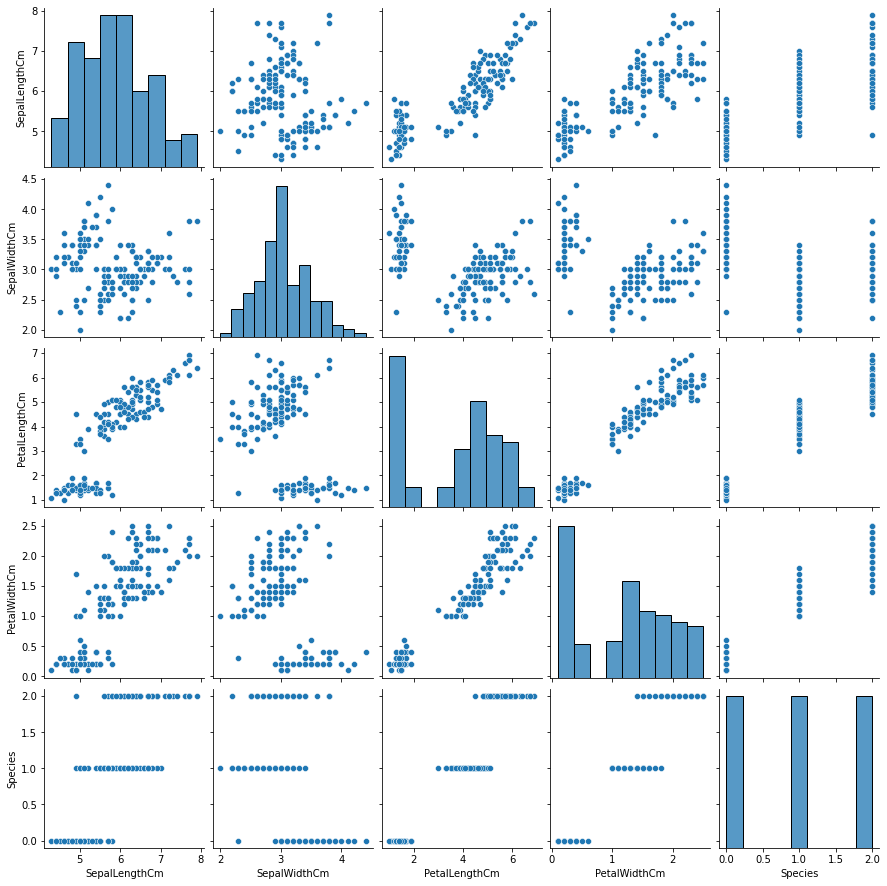

In [30]:
sns.pairplot(df1)

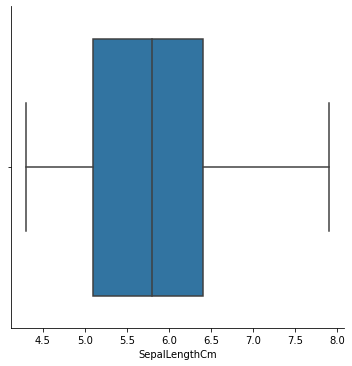

In [31]:
sns.catplot(x=df['SepalLengthCm'],kind='box',data=df1)

# Dividing the data into independent variables and labels

In [32]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

## Splitting the data into Training and Testing sets

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

## Applying Decision Tree Algorithm

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
#Scaling the data
sc=StandardScaler()
X_train_new=sc.fit_transform(X_train)
X_test_new=sc.transform(X_test)
clf=DecisionTreeClassifier(max_leaf_nodes=3)
#fit the algorithm
clf.fit(X_train_new,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix
pred_test=clf.predict(X_test)
print('accuracy score:',accuracy_score(pred_test,y_test))

accuracy score: 0.9666666666666667


In [40]:
df2=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred_test})
df2.head()

,Actual Value,Predicted Value
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0


## Evaluating the Model

In [48]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,pred_test))

Mean Absolute Error: 0.03333333333333333
